In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/drugbank_clean.csv')


<ipython-input-2-5fe38719cdd1>:1: DtypeWarning: Columns (29,30,31,32,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/drugbank_clean.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   type                        15235 non-null  object 
 1   created                     15235 non-null  object 
 2   updated                     15235 non-null  object 
 3   drugbank-id                 16166 non-null  object 
 4   name                        16166 non-null  object 
 5   description                 12929 non-null  object 
 6   cas-number                  9553 non-null   object 
 7   unii                        10934 non-null  object 
 8   state                       9171 non-null   object 
 9   groups                      15235 non-null  object 
 10  synthesis-reference         1604 non-null   object 
 11  indication                  4174 non-null   object 
 12  pharmacodynamics            3042 non-null   object 
 13  mechanism-of-action         391

In [ ]:
columns_to_drop = [
    'drugbank-id','type', 'created', 'updated', 'description', 'cas-number', 'unii', 'food-interactions',
    'synthesis-reference', 'indication', 'pharmacodynamics', 'mechanism-of-action',
    'toxicity', 'metabolism', 'absorption', 'half-life', 'protein-binding',
    'route-of-elimination', 'volume-of-distribution', 'clearance', 'ahfs-codes',
    'sequences', 'pathways', 'reactions', 'snp-effects', 'snp-adverse-drug-reactions',
    'carriers', 'transporters', 'fda-label', 'msds', 'atc-codes',	'pdb-entries'
]

# Assuming 'drugbank-id', 'name', 'groups', 'pdb-entries', 'drug-interactions', 'targets', 'average-mass', 'monoisotopic-mass' are kept for your analysis.

# Drop columns from your dataset
data = data.drop(columns=columns_to_drop)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16166 non-null  object 
 1   state              9171 non-null   object 
 2   groups             15235 non-null  object 
 3   drug-interactions  4478 non-null   object 
 4   enzymes            2301 non-null   object 
 5   targets            7867 non-null   object 
 6   average-mass       11586 non-null  float64
 7   monoisotopic-mass  11586 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [ ]:
data.head(10)

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
0,Lepirudin,solid,approved withdrawn,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,BE0000048,NaN,NaN
3,Cetuximab,liquid,approved,DB05209 DB14905 DB06474 DB09381 DB06647 DB1195...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,BE0002096 BE0000767 BE0000710 BE0002097 BE0002...,NaN,NaN
5,Dornase alfa,liquid,approved,NaN,NaN,BE0004796,NaN,NaN
6,Denileukin diftitox,liquid,approved investigational,DB06770 DB12532 DB00281 DB09107 DB08987 DB0029...,NaN,BE0000651 BE0000658 BE0002102,NaN,NaN
7,Etanercept,liquid,approved investigational,DB08880 DB00328 DB00682 DB00928 DB15274 DB1464...,NaN,BE0009995 BE0000901 BE0000710 BE0001087 BE0002...,NaN,NaN
8,Bivalirudin,solid,approved investigational,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,NaN,2180.2853,2178.985813
9,NaN,NaN,NaN,NaN,BE0001075,BE0000048,NaN,NaN


In [ ]:
data.describe()

,average-mass,monoisotopic-mass
count,11586.000000,11586.000000
mean,382.720268,382.350030
std,265.475892,265.261013
min,2.016000,2.015650
25%,247.352750,247.162565
50%,344.437800,344.161700
75%,445.176000,444.258143
max,6116.740000,6096.882449


In [ ]:
data['targets'] = data['targets'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [ ]:
data.head(10)

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
0,Lepirudin,solid,approved withdrawn,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
3,Cetuximab,liquid,approved,DB05209 DB14905 DB06474 DB09381 DB06647 DB1195...,NaN,0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
5,Dornase alfa,liquid,approved,NaN,NaN,1,NaN,NaN
6,Denileukin diftitox,liquid,approved investigational,DB06770 DB12532 DB00281 DB09107 DB08987 DB0029...,NaN,1,NaN,NaN
7,Etanercept,liquid,approved investigational,DB08880 DB00328 DB00682 DB00928 DB15274 DB1464...,NaN,1,NaN,NaN
8,Bivalirudin,solid,approved investigational,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,0,2180.2853,2178.985813
9,NaN,NaN,NaN,NaN,BE0001075,1,NaN,NaN


In [ ]:
data.dropna(subset=['name'], inplace=True)

In [ ]:
data.dropna(subset=['drug-interactions'], inplace=True)

In [ ]:
data.dropna(subset=['state'], inplace=True)

In [ ]:
data.dropna(subset=['enzymes'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 11 to 16458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1240 non-null   object 
 1   state              1240 non-null   object 
 2   groups             1240 non-null   object 
 3   drug-interactions  1240 non-null   object 
 4   enzymes            1240 non-null   object 
 5   targets            1240 non-null   int64  
 6   average-mass       1149 non-null   float64
 7   monoisotopic-mass  1149 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 87.2+ KB


In [ ]:
# prompt: do label encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_cols = ['name','state','groups','drug-interactions','enzymes']  # Replace with actual categorical column names
for col in categorical_cols:
  data[col] = label_encoder.fit_transform(data[col])

# Display the modified DataFrame
data.head()


,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
11,840,0,1,706,185,1,NaN,NaN
15,566,0,1,701,185,1,NaN,NaN
24,567,0,1,699,185,1,NaN,NaN
25,839,0,0,0,33,1,NaN,NaN
27,841,0,0,697,148,1,NaN,NaN


In [ ]:
data.isnull()

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
11,False,False,False,False,False,False,True,True
15,False,False,False,False,False,False,True,True
24,False,False,False,False,False,False,True,True
25,False,False,False,False,False,False,True,True
27,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
16028,False,False,False,False,False,False,False,False
16069,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False
16109,False,False,False,False,False,False,True,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 11 to 16458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1240 non-null   int64  
 1   state              1240 non-null   int64  
 2   groups             1240 non-null   int64  
 3   drug-interactions  1240 non-null   int64  
 4   enzymes            1240 non-null   int64  
 5   targets            1240 non-null   int64  
 6   average-mass       1149 non-null   float64
 7   monoisotopic-mass  1149 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 87.2 KB


In [ ]:
average_mass_median = data['average-mass'].median()
monoisotopic_mass_median = data['monoisotopic-mass'].median()
print("Average Mass Median:", average_mass_median)
print("Monoisotopic Mass Median:", monoisotopic_mass_median)
# Fill null values with median
data['average-mass'].fillna(average_mass_median, inplace=True)
data['monoisotopic-mass'].fillna(monoisotopic_mass_median, inplace=True)


Average Mass Median: 370.422
Monoisotopic Mass Median: 370.098727764


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 11 to 16458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1240 non-null   int64  
 1   state              1240 non-null   int64  
 2   groups             1240 non-null   int64  
 3   drug-interactions  1240 non-null   int64  
 4   enzymes            1240 non-null   int64  
 5   targets            1240 non-null   int64  
 6   average-mass       1240 non-null   float64
 7   monoisotopic-mass  1240 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 87.2 KB


In [ ]:
data.isnull()

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
11,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16028,False,False,False,False,False,False,False,False
16069,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False
16109,False,False,False,False,False,False,False,False


In [ ]:
data.describe()

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,619.500000,0.929839,5.451613,601.290323,270.996774,0.916129,398.369562,397.963741
std,358.101475,0.255522,8.885202,345.019342,160.478728,0.277306,220.100054,219.941479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.014700,34.005479
25%,309.750000,1.000000,0.000000,309.750000,178.750000,1.000000,287.318200,287.133693
50%,619.500000,1.000000,1.000000,600.500000,216.000000,1.000000,370.422000,370.098728
75%,929.250000,1.000000,6.000000,900.250000,374.250000,1.000000,450.915000,450.157102
max,1239.000000,1.000000,33.000000,1200.000000,646.000000,1.000000,4113.641000,4111.115377


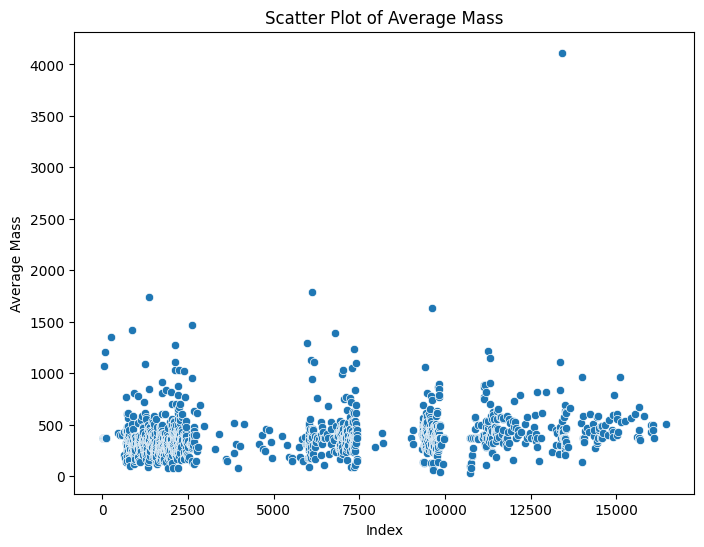

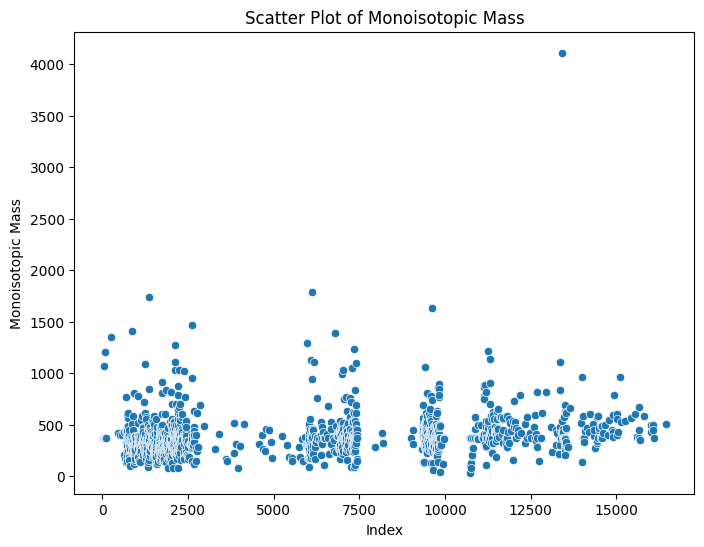

In [ ]:
# prompt: make scartter plot for average-mass and monoisotopic-mas different plot for both

import matplotlib.pyplot as plt
# Scatter plot for 'average-mass'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.index, y=data['average-mass'])
plt.title('Scatter Plot of Average Mass')
plt.xlabel('Index')
plt.ylabel('Average Mass')
plt.show()

# Scatter plot for 'monoisotopic-mass'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.index, y=data['monoisotopic-mass'])
plt.title('Scatter Plot of Monoisotopic Mass')
plt.xlabel('Index')
plt.ylabel('Monoisotopic Mass')
plt.show()


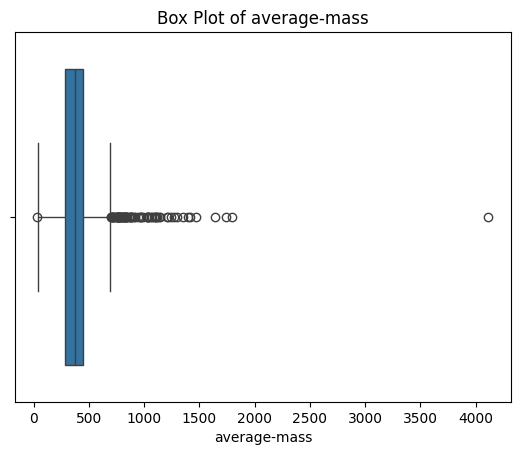

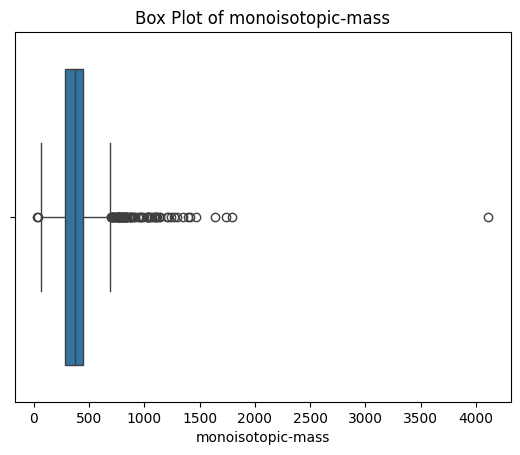

In [ ]:
# prompt: plot box plot to track outliers for all columns

import matplotlib.pyplot as plt
# Box plots for numerical columns to detect outliers
numerical_cols = ['average-mass', 'monoisotopic-mass']
for col in numerical_cols:
  plt.figure()
  sns.boxplot(x=data[col])
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:
# prompt: use z-score to eliminate outliers\

import numpy as np
from scipy import stats

# Calculate z-scores for numerical columns
numerical_cols = ['average-mass', 'monoisotopic-mass']
z_scores = stats.zscore(data[numerical_cols])

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Filter data to remove outliers
data_filtered = data[(np.abs(z_scores) < threshold).all(axis=1)]

# Display the shape of the filtered DataFrame
print("Shape of filtered data:", data_filtered.shape)


Shape of filtered data: (1219, 8)


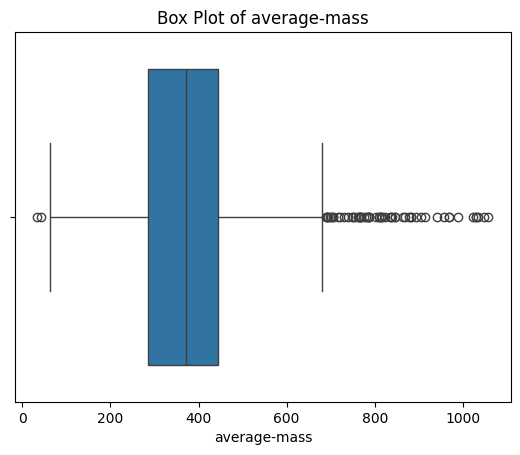

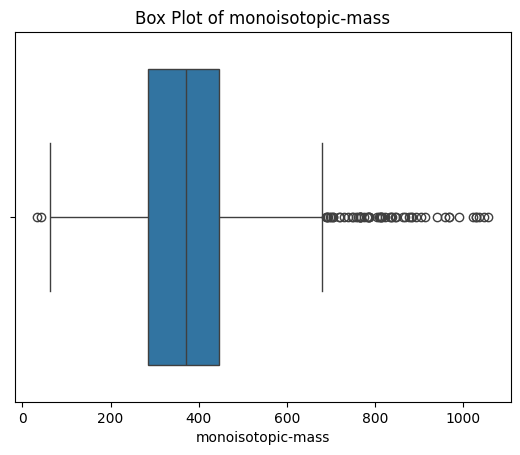

In [ ]:
# prompt: plot box plot to track outliers for all columns

import matplotlib.pyplot as plt
# Box plots for numerical columns to detect outliers
numerical_cols = ['average-mass', 'monoisotopic-mass']
for col in numerical_cols:
  plt.figure()
  sns.boxplot(x=data_filtered[col])
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:
data.describe()

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,619.500000,0.929839,5.451613,601.290323,270.996774,0.916129,398.369562,397.963741
std,358.101475,0.255522,8.885202,345.019342,160.478728,0.277306,220.100054,219.941479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.014700,34.005479
25%,309.750000,1.000000,0.000000,309.750000,178.750000,1.000000,287.318200,287.133693
50%,619.500000,1.000000,1.000000,600.500000,216.000000,1.000000,370.422000,370.098728
75%,929.250000,1.000000,6.000000,900.250000,374.250000,1.000000,450.915000,450.157102
max,1239.000000,1.000000,33.000000,1200.000000,646.000000,1.000000,4113.641000,4111.115377


In [ ]:
# prompt: export cleaned data as csv file

# Assuming 'data_filtered_ior' is your final cleaned DataFrame
data_filtered.to_csv('cleaned_drug_data(z_score).csv', index=False)


In [ ]:
# prompt: apply xgboost on both z scroe data

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Assuming 'targets' is your target variable and the rest are features
X = data_filtered.drop('targets', axis=1)
y = data_filtered['targets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=20)  # 5-fold cross-validation
print("\nCross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


Accuracy: 0.9180327868852459

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.11      0.17        19
           1       0.93      0.99      0.96       225

    accuracy                           0.92       244
   macro avg       0.66      0.55      0.56       244
weighted avg       0.89      0.92      0.90       244


Confusion Matrix:
 [[  2  17]
 [  3 222]]

Cross-Validation Scores: [0.91803279 0.8852459  0.93442623 0.90163934 0.91803279 0.90163934
 0.91803279 0.91803279 0.91803279 0.90163934 0.91803279 0.91803279
 0.85245902 0.91803279 0.91803279 0.93442623 0.86885246 0.91803279
 0.80327869 0.9       ]
Average CV Score: 0.9031967213114752


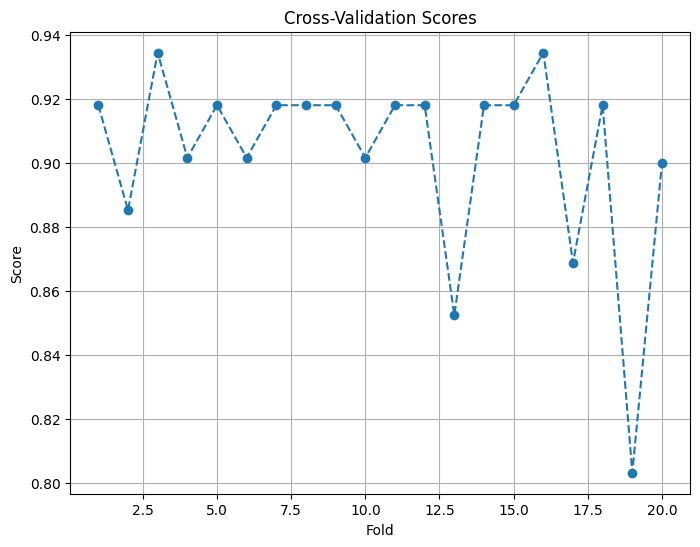

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'cv_scores' contains your cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [ ]:
# prompt: run the for loop for k for 50 times and select K with most repetetion

from sklearn.feature_selection import chi2, SelectKBest

k_counts = {}
for _ in range(50):
    best_accuracy = 0
    best_k = 0

    for k in range(1, 8):
        # Feature selection
        selector = SelectKBest(score_func=chi2, k=k)
        X_new = selector.fit_transform(X, y)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

        # Initialize XGBoost classifier
        xgb_classifier = xgb.XGBClassifier()

        # Train the classifier
        xgb_classifier.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_classifier.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    # Update k counts
    if best_k in k_counts:
        k_counts[best_k] += 1
    else:
        k_counts[best_k] = 1

# Find the most frequent k
most_frequent_k = max(k_counts, key=k_counts.get)

print(f"Most frequently selected k: {most_frequent_k}")

Most frequently selected k: 1


In [ ]:
# select above Fetures in X and perform svm

k = most_frequent_k

# Feature selection with the selected k
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

print(f"Selected Features for k={k}: {selected_feature_names}")

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

# Initialize XGBoost classifier
xgb_classifier_selected = xgb.XGBClassifier()

# Train the classifier on the selected features
xgb_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = xgb_classifier_selected.predict(X_test_selected)

# Evaluate the model
print("Accuracy (Selected Features):", accuracy_score(y_test, y_pred_selected))
print("\nClassification Report (Selected Features):\n", classification_report(y_test, y_pred_selected))
print("\nConfusion Matrix (Selected Features):\n", confusion_matrix(y_test, y_pred_selected))

new_cv_scores = cross_val_score(xgb_classifier_selected, X_selected, y, cv=20)  # 5-fold cross-validation
print("\nCross-Validation Scores:", new_cv_scores)
print("Average CV Score:", new_cv_scores.mean())


Selected Features for k=1: Index(['enzymes'], dtype='object')
Accuracy (Selected Features): 0.9262295081967213

Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.93      1.00      0.96       226

    accuracy                           0.93       244
   macro avg       0.46      0.50      0.48       244
weighted avg       0.86      0.93      0.89       244


Confusion Matrix (Selected Features):
 [[  0  18]
 [  0 226]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Cross-Validation Scores: [0.91803279 0.91803279 0.91803279 0.91803279 0.91803279 0.91803279
 0.91803279 0.91803279 0.91803279 0.91803279 0.91803279 0.91803279
 0.91803279 0.90163934 0.91803279 0.91803279 0.91803279 0.90163934
 0.90163934 0.91666667]
Average CV Score: 0.9155054644808744


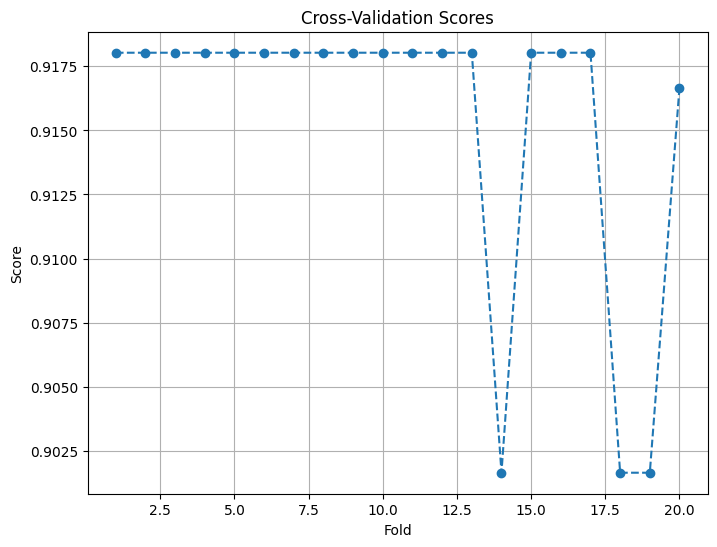

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'cv_scores' contains your cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(new_cv_scores) + 1), new_cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()


Accuracy with 1 features (RFE): 0.8770491803278688
Accuracy with 2 features (RFE): 0.9262295081967213
Accuracy with 3 features (RFE): 0.9057377049180327
Accuracy with 4 features (RFE): 0.8975409836065574
Accuracy with 5 features (RFE): 0.8975409836065574
Accuracy with 6 features (RFE): 0.9262295081967213
Accuracy with 7 features (RFE): 0.8934426229508197

Best accuracy: 0.9262295081967213 achieved with 2 features (RFE)
Selected Features for Best RFE: Index(['name', 'state', 'groups', 'drug-interactions', 'enzymes',
       'average-mass', 'monoisotopic-mass'],
      dtype='object')


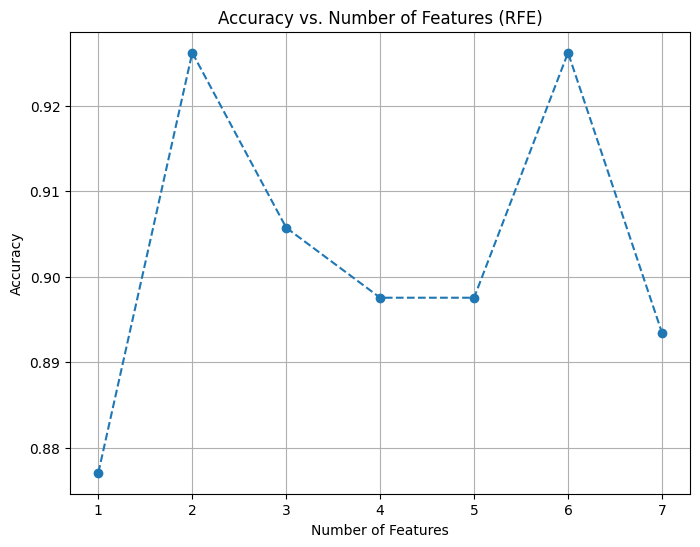

In [ ]:
from sklearn.feature_selection import RFE

num_features = []
accuracies = []

for k in range(1, 8):
    # Initialize XGBoost classifier with a linear kernel
    estimator = xgb.XGBClassifier()

    # Initialize RFE with the estimator and desired number of features
    selector = RFE(estimator, n_features_to_select=k)

    # Fit RFE to the data
    selector = selector.fit(X, y)

    # Get the selected features
    X_selected = X.iloc[:, selector.support_]

    # Split the data into training and testing sets
    X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

    # Train the XGBoost classifier on the selected features
    estimator.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred_selected = estimator.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_selected)

    # Store results
    num_features.append(k)
    accuracies.append(accuracy)

    print(f"Accuracy with {k} features (RFE): {accuracy}")

# Find the best number of features
best_k = num_features[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"\nBest accuracy: {best_accuracy} achieved with {best_k} features (RFE)")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features for Best RFE:", selected_feature_names)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(num_features, accuracies, marker='o', linestyle='--')
plt.title('Accuracy vs. Number of Features (RFE)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [38]:
new_cv_scores = cross_val_score(xgb_classifier, X_selected, y, cv=20)  # 5-fold cross-validation
print("\nCross-Validation Scores:", new_cv_scores)
print("Average CV Score:", new_cv_scores.mean())


Cross-Validation Scores: [0.91803279 0.8852459  0.93442623 0.90163934 0.91803279 0.90163934
 0.91803279 0.91803279 0.91803279 0.90163934 0.91803279 0.91803279
 0.85245902 0.91803279 0.91803279 0.93442623 0.86885246 0.91803279
 0.80327869 0.9       ]
Average CV Score: 0.9031967213114752


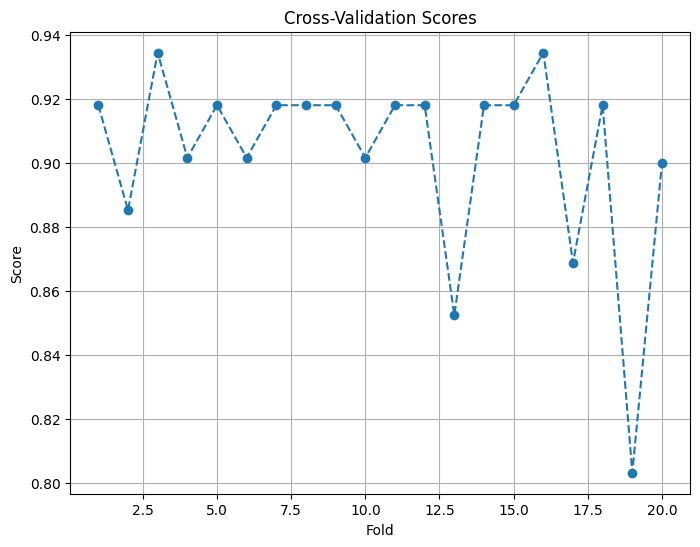

In [39]:
import matplotlib.pyplot as plt
# Assuming 'cv_scores' contains your cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(new_cv_scores) + 1), new_cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV with XGBoost classifier and parameter grid
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=20, scoring='f1_weighted')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the test set using the best estimator
y_pred_best = best_estimator.predict(X_test)

# Evaluate the model with the best parameters
print("Accuracy (Best Parameters):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Best Parameters):\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (Best Parameters):\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Accuracy (Best Parameters): 0.8852459016393442

Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.25      0.04      0.07        26
           1       0.90      0.99      0.94       218

    accuracy                           0.89       244
   macro avg       0.57      0.51      0.50       244
weighted avg       0.83      0.89      0.85       244


Confusion Matrix (Best Parameters):
 [[  1  25]
 [  3 215]]
